## <span style="color:chocolate"> Exercise 02.1: MC integrals and Importance Sampling </span>

In [43]:
#import essential libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#parameter to use Latex in matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
#a plot label should be easy to read
plt.rcParams.update({'font.size': 14})

We want to compute the integral
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$
with Monte Carlo methods. We do so in 4 different ways, plotting the estimation of $I$, $\langle G(x) \rangle_{p(x)}$, and its uncertainty as a function of the block number N, each block consisting of $10^4$ throws. 


Note that we are interested in the behaviour of the integral uncertainty $\sigma_I$ which is associated with the sampling pdf $p(x)$ we are choosing: the more similar $p(x)$ is to the integrand we are interested, the lower we expect $\sigma_I$ to be according to the **importance sampling** principle.

The 4 considered ways are:
1) **uniform sampling**: this method is the easiest to implement yet not so precise since it gives same weight to domain regions associated with a big or small value of the integrand $$\begin{cases}
G(x) = \frac{\pi}{2}\cos(\pi x/2) & \\
p(x) \sim \mathrm{unif}(0,1)
\end{cases} $$

2) **exponential sampling**: we try this choice because the $e^{-x}$ function is an easy to sample pdf through the inverse sampling method and follows the integrand's shape better than the uniform pdf
$$\begin{cases}
G(x) =  \frac{\pi}{2} \frac{ \cos(\pi x/2) }{ e^{-x} } (1-e^{-1})\\
p(x) = \frac{e^{-x} }{(1-e^{-1})}
\end{cases} $$

3) **order 2 polynomial sampling**: the parabola with vertex on $(0,\pi/2)$ and zero in $(1,0)$ approximates very well the integrand shape. However, sampling this $p(x)$ is a cost since we have to use the accept/reject method in a rectangular box
$$\begin{cases}
G(x) =  \frac{\pi}{3} \frac{ \cos(\pi x/2) }{1-x^2} \\
p(x) \propto \frac{\pi}{2}(1-x^2)
\end{cases} $$

4) **antithetic variates**: the integral is the same if we evaluate the integrand in $x$ or in $1-x$. We can exploit this property if the integrand $G$ is anti-correlated(e.g. it is roughly approximated by a linear function with negative slope). In this case $G(x)$ and $G(1-x)$ will differ greatly, leading with a big $\sigma_I$. We can then define a new integrand as the sum of the two contributions, so that the returned values for each call will be evened out, thus reducing the $\sigma_I$. Moreover, we can pair this redefinition of $G$ with an uniform sampling, which means efficiency.
$$\begin{cases}
G(x) = \frac{1}{2}\frac{\pi}{2}\left[\cos(\pi x/2)+\cos(\pi (1-x)/2) \right]& \\
p(x) \sim \mathrm{unif}(0,1)
\end{cases} $$

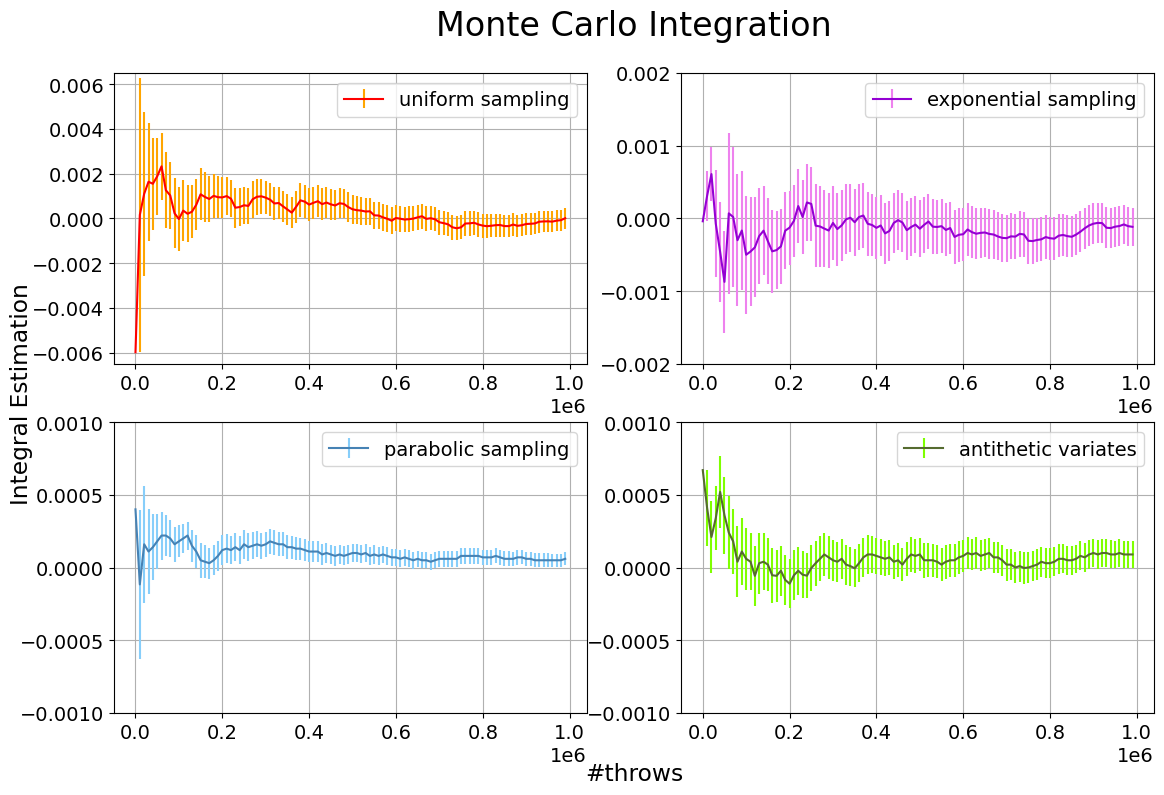

In [95]:
#import data formatted as table from a .txt file
data = np.loadtxt('ex02.1.txt', skiprows=1)
M=1e6                 # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N
#populate and rescale x axis
x= np.arange(N)*L 

#plot the results with errors
fig,ax = plt.subplots(2,2,figsize=(13,8))
axs = ax.flatten()
axs[0].errorbar(x,data[:,0]-1,yerr=data[:,1], color="red", ecolor="orange", label='uniform sampling')
axs[0].grid(True)
axs[0].set_ylim(-0.0065,0.0065)
axs[0].legend()

axs[1].errorbar(x,data[:,4]-1,yerr=data[:,5], color="darkviolet", ecolor="violet",label='exponential sampling')
axs[1].grid(True)
axs[1].set_ylim(-0.002,0.002)
axs[1].legend()

axs[2].errorbar(x,data[:,2]-1,yerr=data[:,3], color="steelblue", ecolor="lightskyblue", label='parabolic sampling')
axs[2].grid(True)
axs[2].set_ylim(-0.001,0.001)
axs[2].legend()

axs[3].errorbar(x,data[:,6]-1,yerr=data[:,7], color="darkolivegreen", ecolor="chartreuse", label='antithetic variates')
axs[3].grid(True)
axs[3].set_ylim(-0.001,0.001)
axs[3].legend()

fig.supxlabel('#throws')
fig.supylabel(r'Integral Estimation')

fig.suptitle("Monte Carlo Integration",fontsize=24)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)

plt.show()

Please note the different scales between plots.

We can infer from the plots that $\sigma_I$ decreases with $\sqrt N$.

The parabolic sampling is the best method error-wise, but also the least efficiency. The antithetic variates method, which is the second best, looks like the best medium, since it has huge improvements versus the uniform sampling but at the same costs. Finally, the exponential sampling has, as we expected, better performances than the uniform sampling.

## <span style="color:chocolate"> Exercise 02.2: 3D Random Walk, Discrete and Continuous </span>

We now simulate a RD random walk (rw):
- on a cubic lattice (discrete space);
- in the continuous space.

We simulate a path of $100$ steps by sampling each step uniformly in space
- there are 6 possibilities for the cubic lattice (forward-backward and x-y-z)
- and a continuum of possibilities in the continuum space: binding the step length to 1, $\theta \in [0,\pi], \varphi \in [0,2\pi]$

Statistical meaning of the rw is obtained by sampling $10^5$ realizations of possible paths, then via blocking average we evaluate the root mean square distance from the origin as a function of the step and its error as the number of blocks increases.


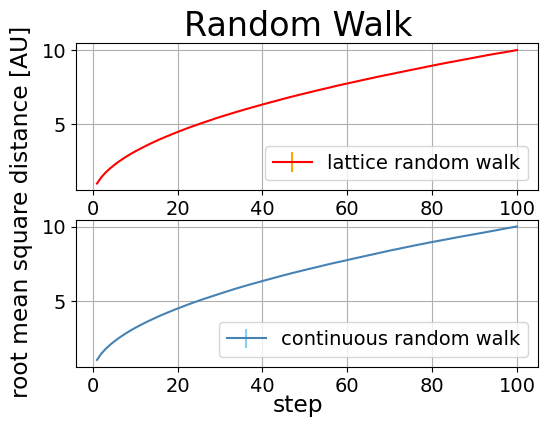

In [126]:
#import data formatted as table from a .txt file
data = np.loadtxt('ex02.2.txt', skiprows=1)

M=1e5                 # Total number of realizations
N=100                 # Number of steps

#populate x axis from 1 to 100
x= np.arange(N)+1

#plot the results with errors
fig,ax = plt.subplots(2,1,figsize=(6,4.2))
axs = ax.flatten()
axs[0].errorbar(x,data[:,0],yerr=data[:,1], color="red", ecolor="orange",label="lattice random walk")
axs[0].grid(True)
axs[0].legend()

axs[1].errorbar(x,data[:,2],yerr=data[:,3], color="steelblue", ecolor="lightskyblue", label="continuous random walk")
axs[1].grid(True)
axs[1].legend()

fig.supxlabel('step')
fig.supylabel("root mean square distance [AU]")
fig.suptitle("Random Walk",fontsize=24)
plt.subplots_adjust(left=0.13, bottom=0.13, right=0.9, top=0.9, wspace=0.2, hspace=0.2)

plt.show()

please note that the error bar are not visible as they are very small. They can be seen in the next plot.

We observe that no difference can be found in the two cases. We believe this is due to the central lmit theorem: with considerable statistics, both phenomena converge to a **diffusive process**.

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
in a diffusion process the system density $\rho(x,t)$ solves the PDE:
$$
\frac{\partial{\rho(x,t)} }{\partial{t}} = D \frac{\partial^2{\rho(x,t)}}{\partial x^2}
$$
where $D=\frac{a^2}{2\tau}$ is the diffusion constant defined by the step length $a$ and the time step $\tau$.
The solution to this equation is:
$$
\rho(x,t)= \frac{1}{\sqrt{4\pi D t}}\exp\left[-\frac{x^2}{4 D t} \right]
$$
and as a consequence:
$$
\begin{cases}
    \langle x(t) \rangle = 0 \\
    \langle x^2(t) \rangle = 2 D t
\end{cases}
$$
</p>

The sum of consecutive steps (which have finite variance) of the rw constitutes a random variable that follows the central limit theorem! In fact we observe universality between discrete and continuous rw and they both show diffusive behaviour as it is suggested by the next section: the **root mean square distance** $\sqrt{\langle x^2(t)\rangle}$ follows a $\sqrt{x}$ law.

In particular $\sqrt{\langle x^2(t)\rangle} = \sqrt{t}$ since in our case $a=1,\tau=1, D=1/2$.

To emphasize such claim, we plot our results after subtracting the underlying diffusive behaviour.

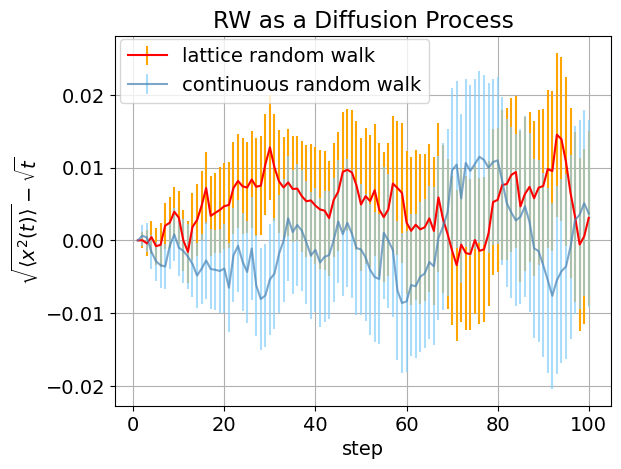

In [136]:
#import data formatted as table from a .txt file
data = np.loadtxt('ex02.2.txt', skiprows=1)

M=1e5                 # Total number of throws
N=100                 # Number of blocks

#populate x axis from 1 to 100
x= np.arange(N)+1
#plot the results with errors
plt.errorbar(x,data[:,0]-np.sqrt(x),yerr=data[:,1], color="red", ecolor="orange",label="lattice random walk")
plt.errorbar(x,data[:,2]-np.sqrt(x),yerr=data[:,3], color="steelblue", ecolor="lightskyblue",alpha=0.7,label="continuous random walk")

plt.xlabel('step')
plt.ylabel(r"$\sqrt{\langle x^2(t)\rangle} - \sqrt{t}$")
plt.title("RW as a Diffusion Process")
plt.grid(True)
plt.legend(loc=(0.01,0.82))

plt.show()